# Graphs for performance evaluation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# from utils.model_image_structure import generate_model_structure

In [5]:
%pip install pydot pydotplus graphviz

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------  276.5/278.7 kB ? eta -:--:--
     ---------------------------------------  276.5/278.7 kB ? eta -:--:--
     ---------------------------------------  276.5/278.7 kB ? eta -:--:--
     ---------------------------------------  276.5/278.7 kB ? eta -:--:--
     -------------------------------------- 278.7/278.7 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------- ----- 41.0/47.0 kB ? eta -:--:--
     ---------------------------------- ----- 41.0/47.0 kB ? eta -:--:--
     -------------------------------------- 47.0/47.0 kB 391.5 kB/s eta 0:00:00
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24588 sha256=6b1aa9ec1dea72d1cbe51eca8656362b84efabffaec1e16f092dcf27


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
generate_model_structure()

Initiating the optimizer
Initiating the BERT


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Creating the model
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Initial training with unbalanced dataset and no data augmentation

In [2]:
score_unbalanced = pd.read_json("14-04-2024-23-21-13_mtm_with_bert_20_70_adam_40_20_with_regularization_history.json")

In [3]:
score_unbalanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loss                           20 non-null     float64
 1   emotion_output_loss            20 non-null     float64
 2   toxicity_output_loss           20 non-null     float64
 3   emotion_output_accuracy        20 non-null     float64
 4   emotion_output_precision       20 non-null     float64
 5   emotion_output_recall          20 non-null     float64
 6   emotion_output_em_auc          20 non-null     float64
 7   emotion_output_f1_score        20 non-null     object 
 8   toxicity_output_accuracy       20 non-null     float64
 9   toxicity_output_precision      20 non-null     float64
 10  toxicity_output_recall         20 non-null     float64
 11  toxicity_output_to_auc         20 non-null     float64
 12  toxicity_output_f1_score       20 non-null     objec

#### Loss vs. Epochs

In [4]:
# Plot training & validation loss values
def loss_epoch_plot(score):
    fig = plt.figure(figsize=(11, 9))
    fig.suptitle('Model Losses', fontsize=16, y=1.0, fontweight='bold')

    ax = fig.add_subplot(2, 2, 1)
    ax.plot(score['loss'])
    ax.plot(score['val_loss'])
    ax.set_title('Model loss',fontsize=9)
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Loss', 'Validation Loss'], loc='upper left')

    ax = fig.add_subplot(2, 2, 2)
    ax.plot(score['emotion_output_loss'])
    ax.plot(score['val_emotion_output_loss'])
    ax.set_title('Emotion Output Loss', fontsize=9)
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Loss', 'Validation Loss'], loc='upper left')

    ax = fig.add_subplot(2, 2, 3)
    ax.plot(score['toxicity_output_loss'])
    ax.plot(score['val_toxicity_output_loss'])
    ax.set_title('Toxicity Output Loss', fontsize=9)
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Loss', 'Validation Loss'], loc='upper left')



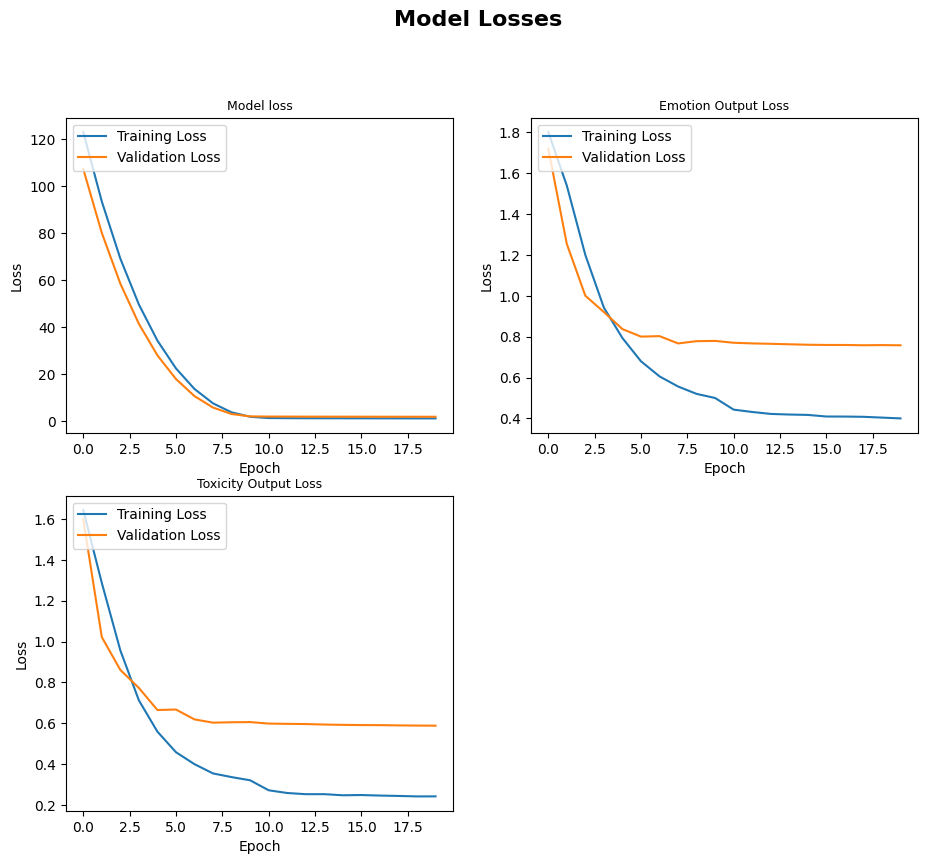

In [5]:
loss_epoch_plot(score_unbalanced)

#### Accuracy vs. Epochs

In [6]:
# Plot training & validation accuracy values
def accuracy_epoch_plot(score):
    fig = plt.figure(figsize=(11, 9))
    fig.suptitle('Model Accuracy', fontsize=16)

    ax = fig.add_subplot(2, 2, 1)
    ax.plot((score['emotion_output_accuracy'] + score['toxicity_output_accuracy']) / 2)
    ax.set_title('Overall Model Accuracy', fontsize=9)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Accuracy'], loc='upper left')
    
    ax = fig.add_subplot(2, 2, 2)
    ax.plot(score['emotion_output_accuracy'])
    ax.set_title('Emotion Output Accuracy', fontsize=9)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Accuracy'], loc='upper left')

    ax = fig.add_subplot(2, 2, 3)
    ax.plot(score['toxicity_output_accuracy'])
    ax.set_title('Toxicity Output Accuracy', fontsize=9)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Accuracy'], loc='upper left')

    plt.show()


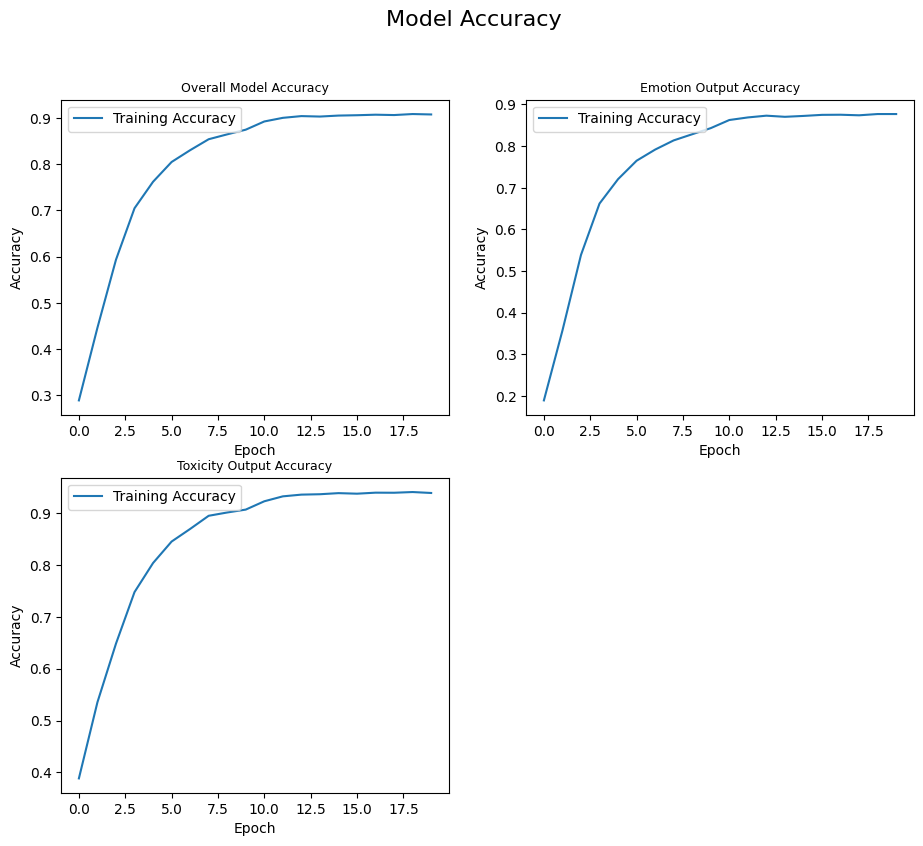

In [7]:
accuracy_epoch_plot(score_unbalanced)

#### Precision vs. Epochs

In [8]:
# Plot training & validation precision values
def precision_epoch_plot(score):
    fig = plt.figure(figsize=(11, 9))
    fig.suptitle('Model Precision', fontsize=16)

    ax = fig.add_subplot(2, 2, 1)
    ax.plot((score['emotion_output_precision'] + score['toxicity_output_precision']) / 2)
    ax.set_title('Overall Model Precision', fontsize=9)
    ax.set_ylabel('Precision')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Precision'], loc='upper left')

    ax = fig.add_subplot(2, 2, 2)
    ax.plot(score['emotion_output_precision'])
    ax.set_title('Emotion Output Precision', fontsize=9)
    ax.set_ylabel('Precision')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Precision'], loc='upper left')

    ax = fig.add_subplot(2, 2, 3)
    ax.plot(score['toxicity_output_precision'])
    ax.set_title('Toxicity Output Precision', fontsize=9)
    ax.set_ylabel('Precision')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Precision'], loc='upper left')

    plt.show()

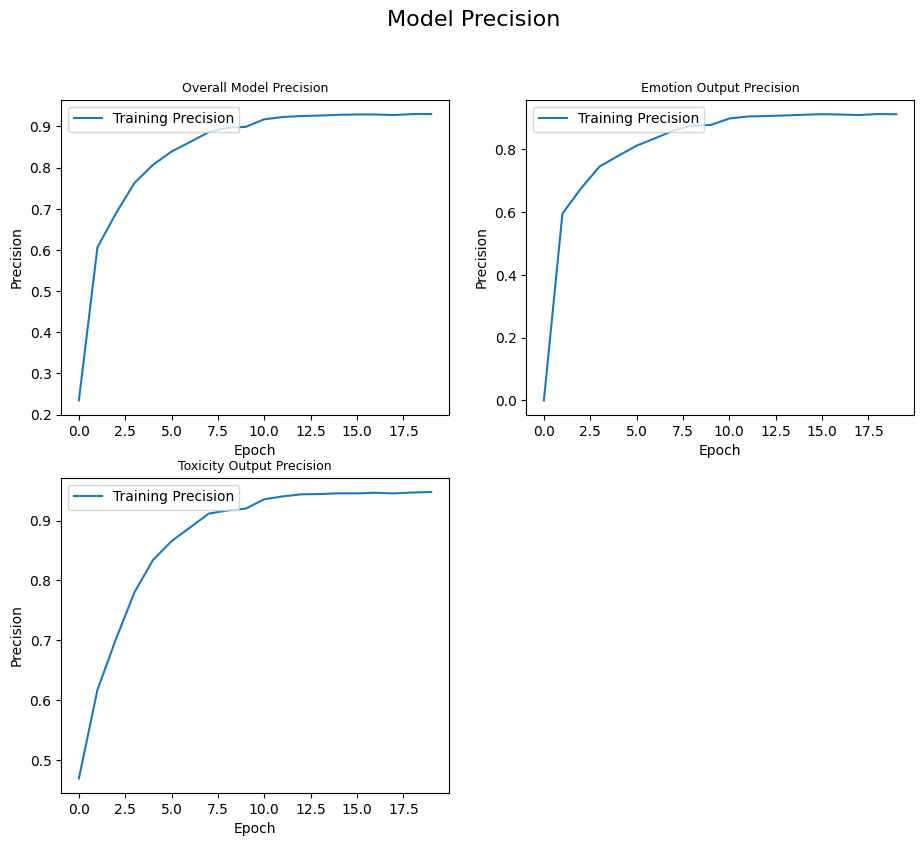

In [9]:
precision_epoch_plot(score_unbalanced)

#### Recall vs. Epochs

In [10]:
# Plot training & validation recall values
def recall_epoch_plot(score):
    fig = plt.figure(figsize=(11, 9))
    fig.suptitle('Model Recall', fontsize=16)

    ax = fig.add_subplot(2, 2, 1)
    ax.plot((score['emotion_output_recall'] + score['toxicity_output_recall']) / 2)
    ax.set_title('Overall Model Recall', fontsize=9)
    ax.set_ylabel('Recall')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Recall'], loc='upper left')


    ax = fig.add_subplot(2, 2, 2)
    ax.plot(score['emotion_output_recall'])
    ax.set_title('Emotion Output Recall', fontsize=9)
    ax.set_ylabel('Recall')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Recall'], loc='upper left')

    ax = fig.add_subplot(2, 2, 3)
    ax.plot(score['toxicity_output_recall'])
    ax.set_title('Toxicity Output Recall', fontsize=9)
    ax.set_ylabel('Recall')
    ax.set_xlabel('Epoch')
    ax.legend(['Training Recall'], loc='upper left')

    plt.show()

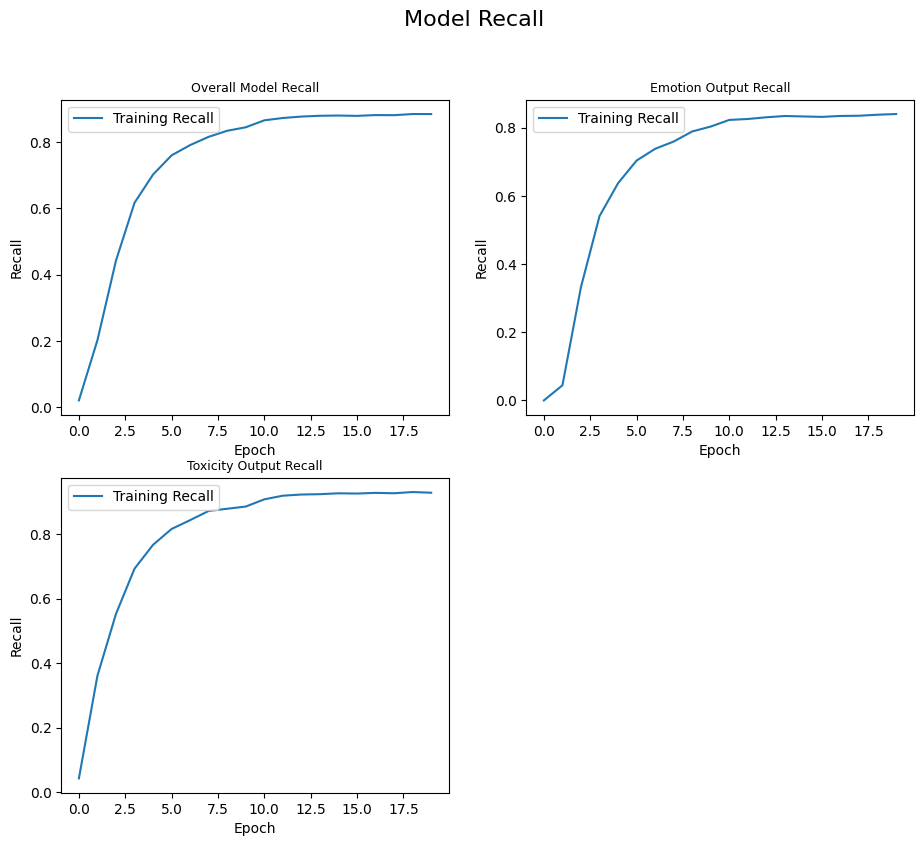

In [11]:
recall_epoch_plot(score_unbalanced)

#### AUC vs. Epochs

In [12]:
# Plot training & validation AUC values
def auc_epoch_plot(score):
    fig = plt.figure(figsize=(11, 9))
    fig.suptitle('Model AUC', fontsize=16)

    ax = fig.add_subplot(2, 2, 1)
    ax.plot((score['emotion_output_em_auc'] + score['toxicity_output_to_auc']) / 2)
    ax.set_title('Overall Model AUC', fontsize=9)
    ax.set_ylabel('AUC')
    ax.set_xlabel('Epoch')
    ax.legend(['Training AUC'], loc='upper left')


    ax = fig.add_subplot(2, 2, 2)
    ax.plot(score['emotion_output_em_auc'])
    ax.set_title('Emotion Output AUC', fontsize=9)
    ax.set_ylabel('AUC')
    ax.set_xlabel('Epoch')
    ax.legend(['Training AUC'], loc='upper left')

    ax = fig.add_subplot(2, 2, 3)
    ax.plot(score['toxicity_output_to_auc'])
    ax.set_title('Toxicity Output AUC', fontsize=9)
    ax.set_ylabel('AUC')
    ax.set_xlabel('Epoch')
    ax.legend(['Training AUC'], loc='upper left')

    plt.show()

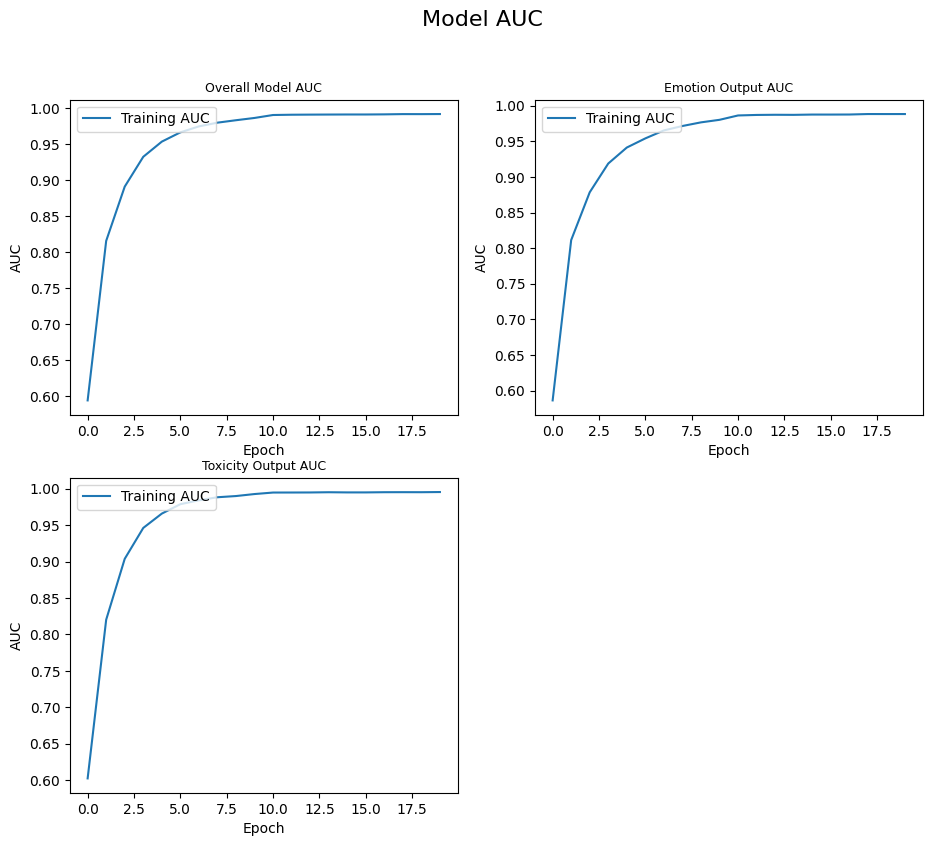

In [13]:
auc_epoch_plot(score_unbalanced)

In [13]:
# Plot training & validation F1 values
def F1_epoch_plot(score):
    fig = plt.figure(figsize=(11, 9))
    fig.suptitle('Model F1 Score', fontsize=16)

    ax = fig.add_subplot(2, 2, 1)
    ax.plot((score['emotion_output_f1_score'] + score['toxicity_output_f1_score']) / 2)
    ax.set_title('Overall Model F1 Score', fontsize=9)
    ax.set_ylabel('F1 Score')
    ax.set_xlabel('Epoch')
    ax.legend(['Training F1 Score'], loc='upper left')


    ax = fig.add_subplot(2, 2, 2)
    ax.plot(score['emotion_output_f1_score'][0])
    ax.plot(score['emotion_output_f1_score'][0])
    ax.plot(score['emotion_output_f1_score'][0])
    ax.plot(score['emotion_output_f1_score'][0])

    ax.set_title('Emotion Output F1 Score', fontsize=9)
    ax.set_ylabel('F1 Score')
    ax.set_xlabel('Epoch')
    ax.legend(['Training F1 Score'], loc='upper left')

    ax = fig.add_subplot(2, 2, 3)
    ax.plot(score['toxicity_output_f1_score'])
    ax.set_title('Toxicity Output F1 Score', fontsize=9)
    ax.set_ylabel('F1 Score')
    ax.set_xlabel('Epoch')
    ax.legend(['Training F1 Score'], loc='upper left')

    plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

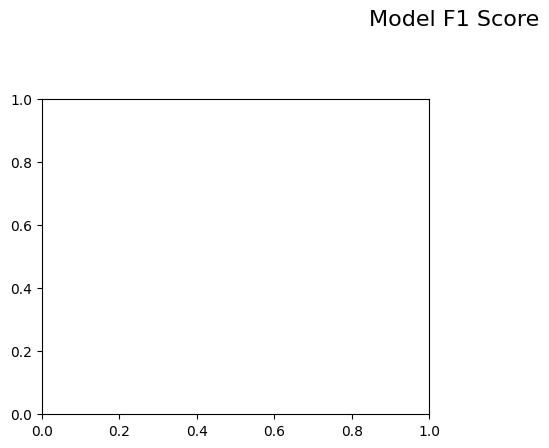

In [17]:
F1_epoch_plot(score_unbalanced)

The model is clearly overfitting the training data. The validation loss increases after 10 epochs, while the training loss continues to decrease. The validation accuracy also decreases after 10 epochs, while the training accuracy continues to increase. The validation AUC also decreases after 10 epochs, while the training AUC continues to increase. The validation precision and recall also decrease after 10 epochs, while the training precision and recall continue to increase.

The model is not able to learn anything from the unbalanced dataset. The accuracy is stuck at 0.5 and the loss is not decreasing.

Therefor, we need to balance the dataset and use data augmentation to improve the model performance. might remove some classes to make the dataset more balanced.

The table below shows the final value on each metics

In [18]:
# get the final scores then put on a table using seaborn
final_score_val = score_unbalanced.iloc[-1, 11:]
final_score_train = score_unbalanced.iloc[-1, 0:11]

In [19]:
df_score = pd.DataFrame({'train': final_score_train, 'val': final_score_val.values})


ValueError: array length 12 does not match index length 11

In [47]:
(

score_unbalanced["emotion_output_recall"][19],
score_unbalanced["toxicity_output_recall"][19],
score_unbalanced["emotion_output_em_auc"][19],
score_unbalanced["toxicity_output_to_auc"][19],
score_unbalanced["emotion_output_f1_score"][19],
score_unbalanced["toxicity_output_f1_score"][19])


(0.8400060534477231,
 0.9285390377044671,
 0.9866609573364251,
 0.9963599443435661,
 [0.8683206,
  0.8509485999999999,
  0.8886782999999999,
  0.90277123,
  0.8480348999999999,
  0.9032526999999999],
 [0.89225584,
  0.9509707,
  0.923348,
  0.9849462,
  0.95539904,
  0.9503545999999999,
  0.89744824])

## Initial 2 with almost balanced dataset

In [58]:
score_unbalanced_2 = pd.read_json("07-12-2023-22-23-28_mtm_with_bert_35_64_adam_40_20_with_regularization_history.json")

#### Loss vs. Epochs

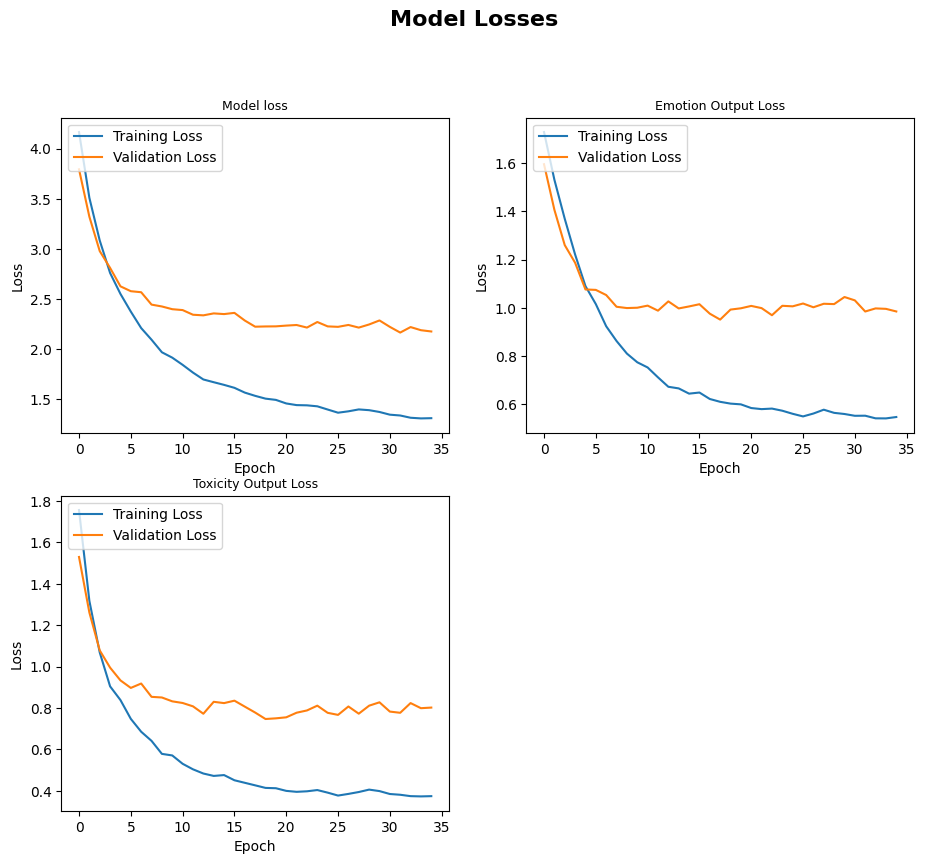

In [59]:
loss_epoch_plot(score_unbalanced_2)

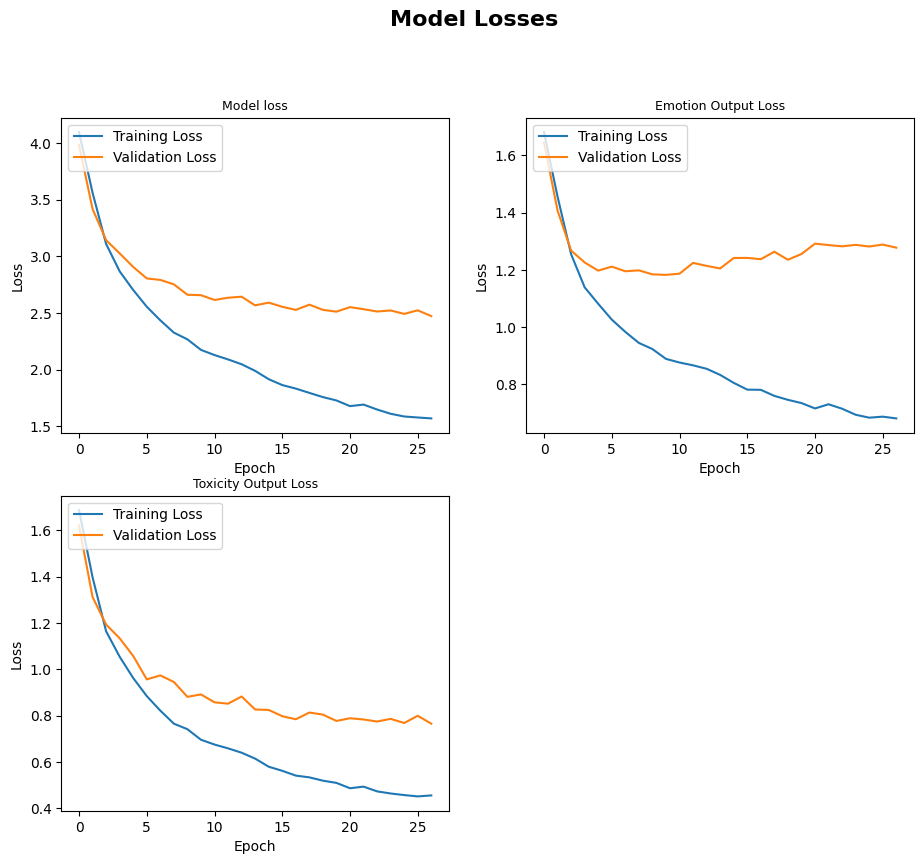

In [60]:
loss_epoch_plot(score_unbalanced)

#### Accuracy vs. Epochs

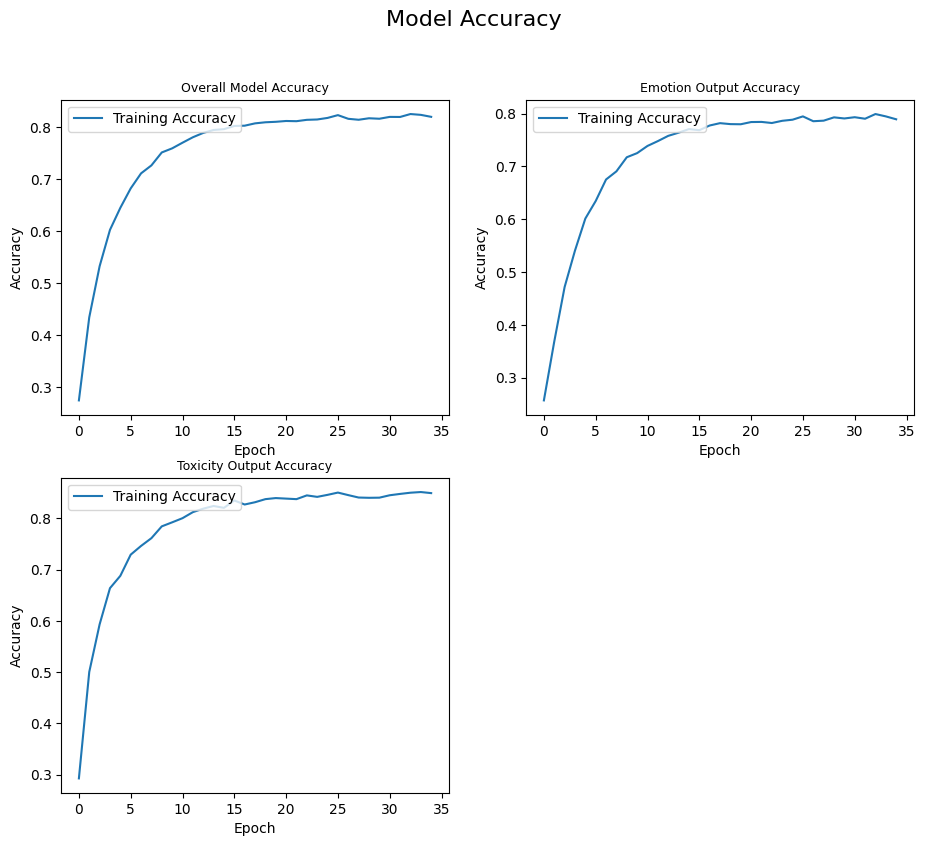

In [61]:
accuracy_epoch_plot(score_unbalanced_2)

#### Precision vs. Epochs

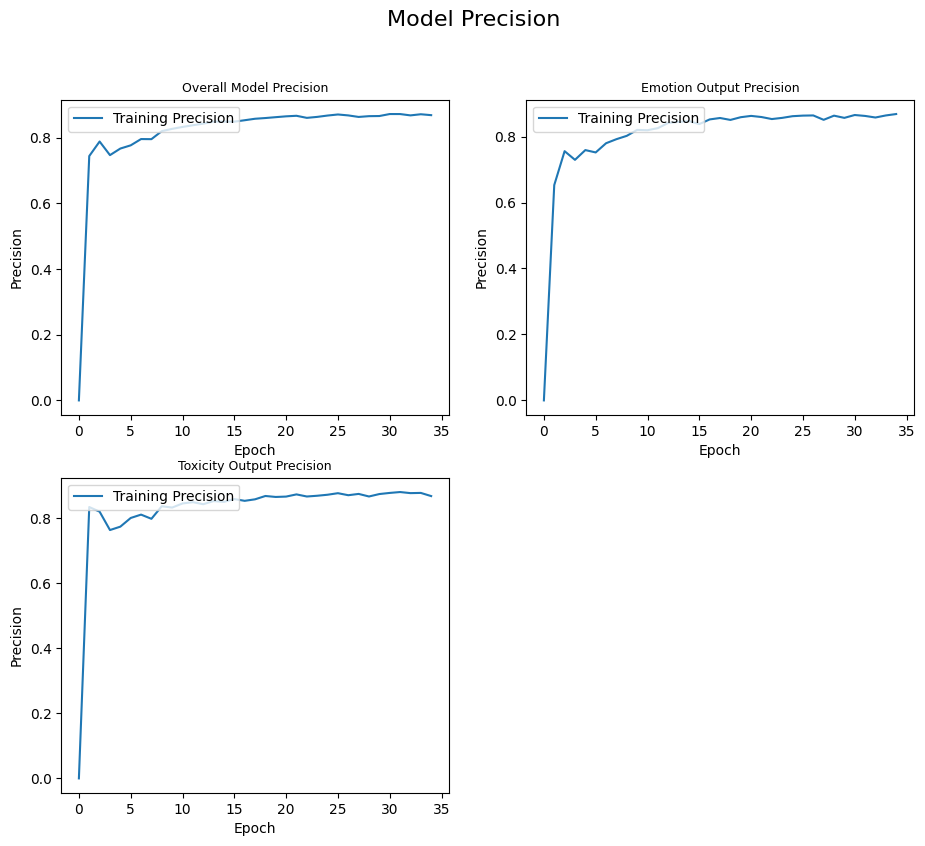

In [62]:
precision_epoch_plot(score_unbalanced_2)

#### Recall vs. Epochs

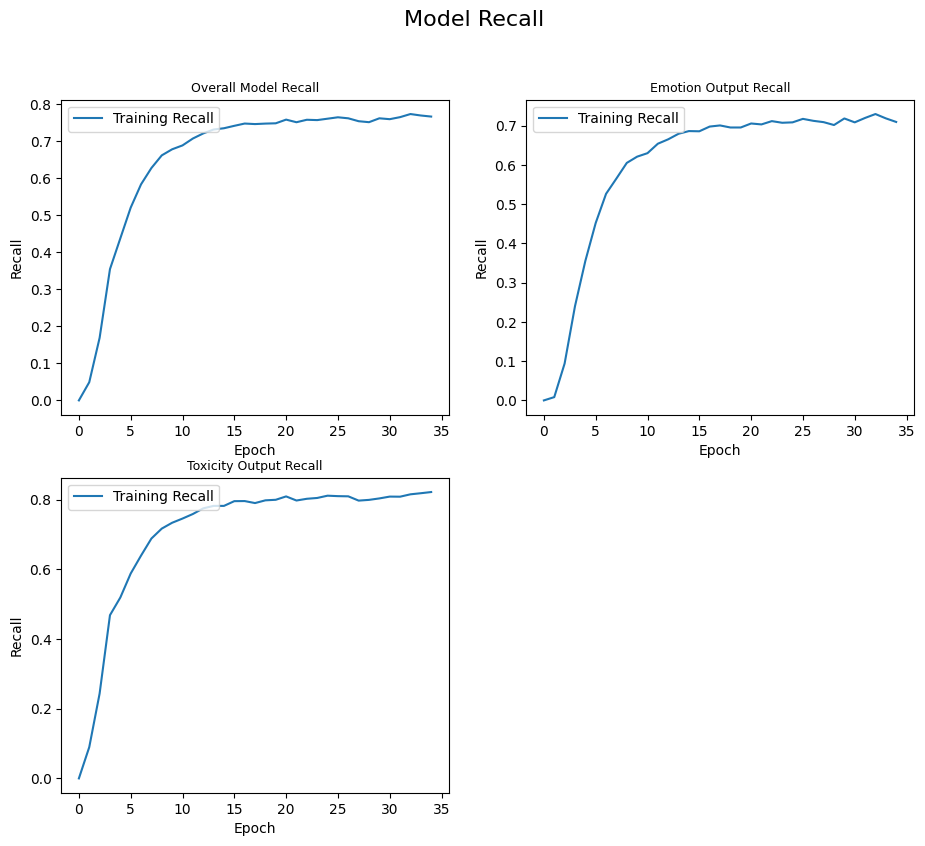

In [63]:
recall_epoch_plot(score_unbalanced_2)

#### AUC vs. Epochs

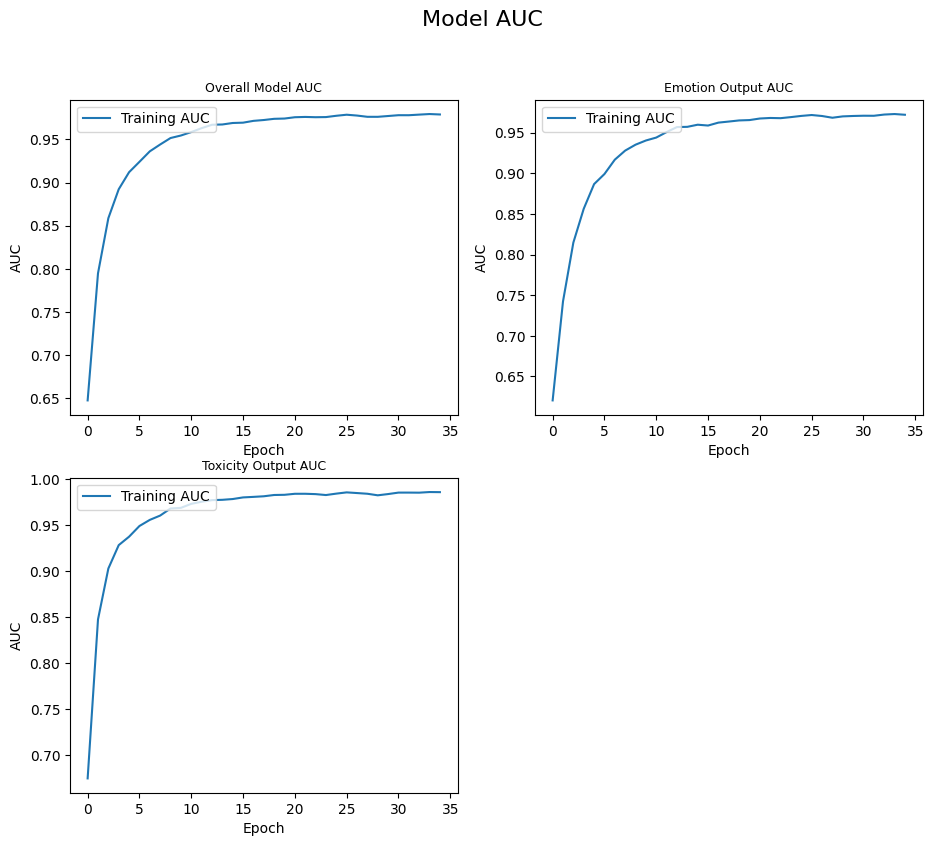

In [64]:
auc_epoch_plot(score_unbalanced_2)

## With adjuested learning rate

In [65]:
with_scheduler = pd.read_json("09-12-2023-22-56-29_mtm_with_bert_30_64_adam_42_21_with_regularization_history.json")

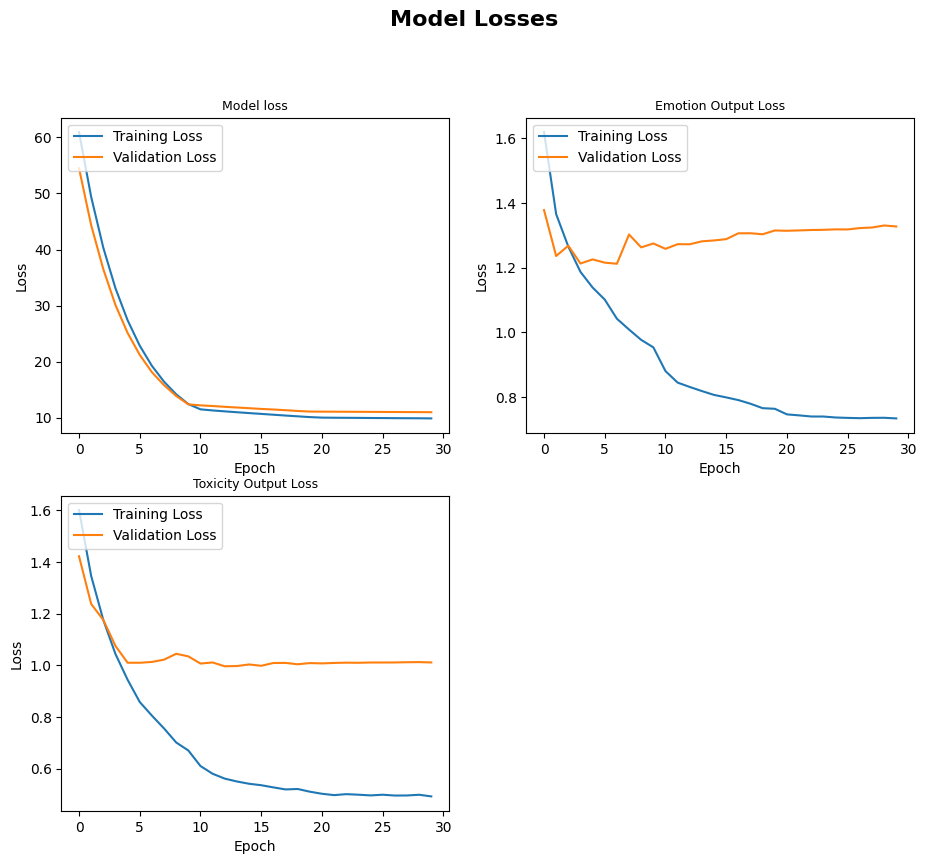

In [66]:
# Losses vs Epochs
loss_epoch_plot(with_scheduler)

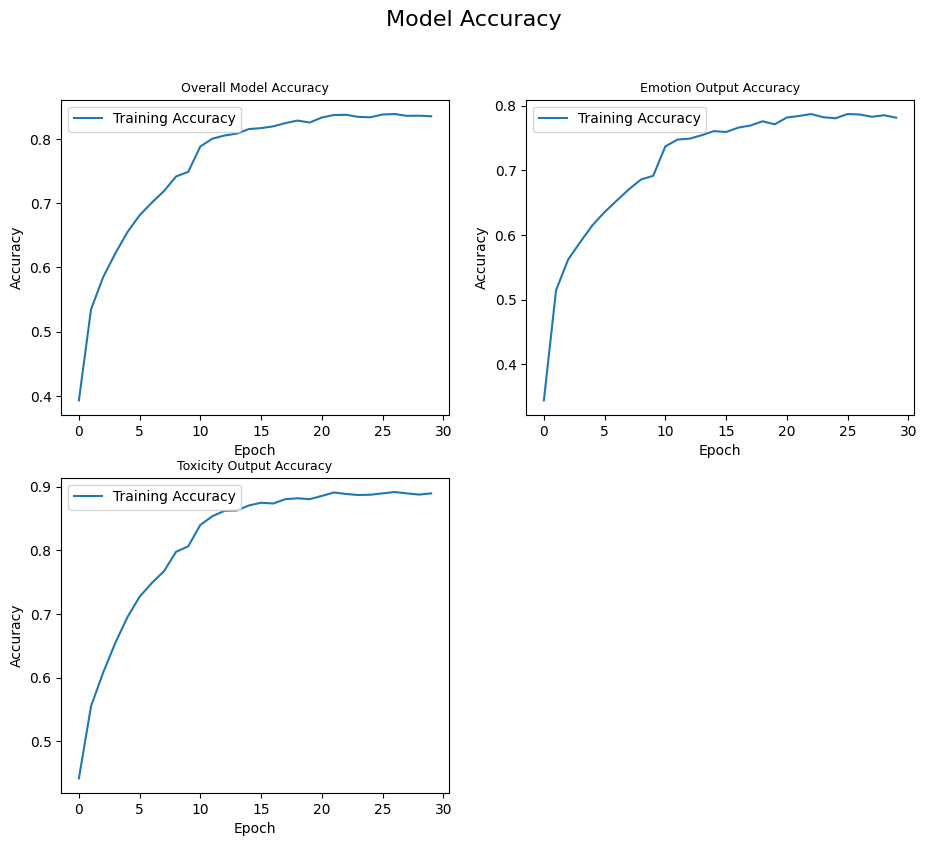

In [67]:
accuracy_epoch_plot(with_scheduler)

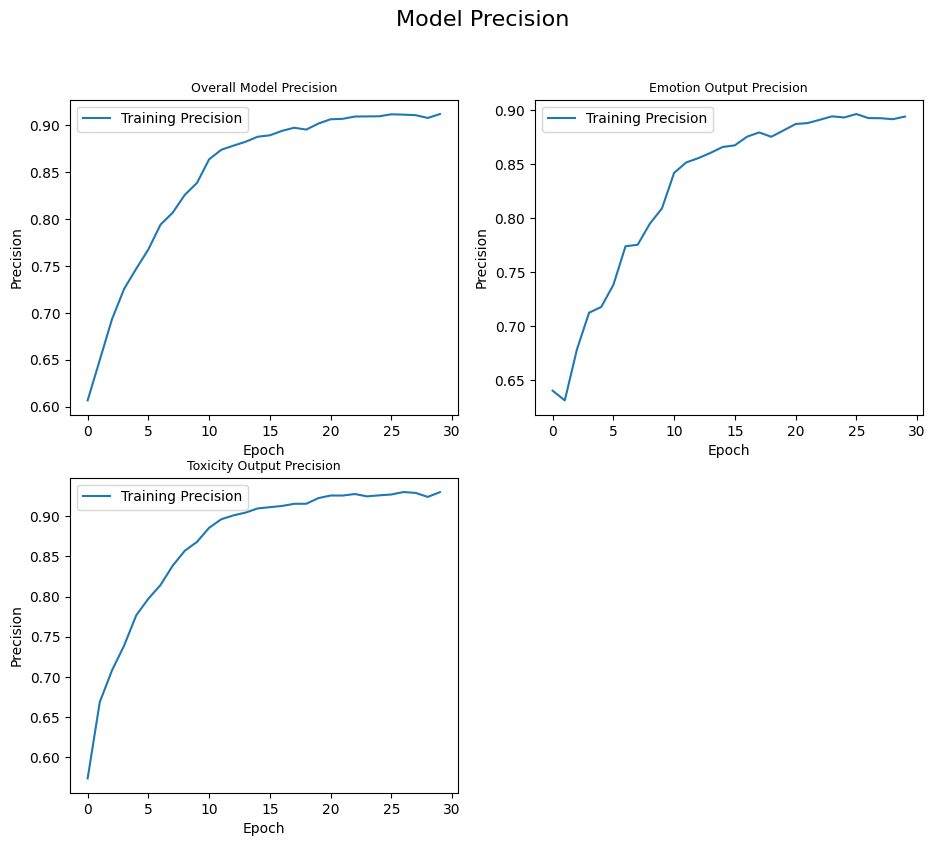

In [68]:
precision_epoch_plot(with_scheduler)

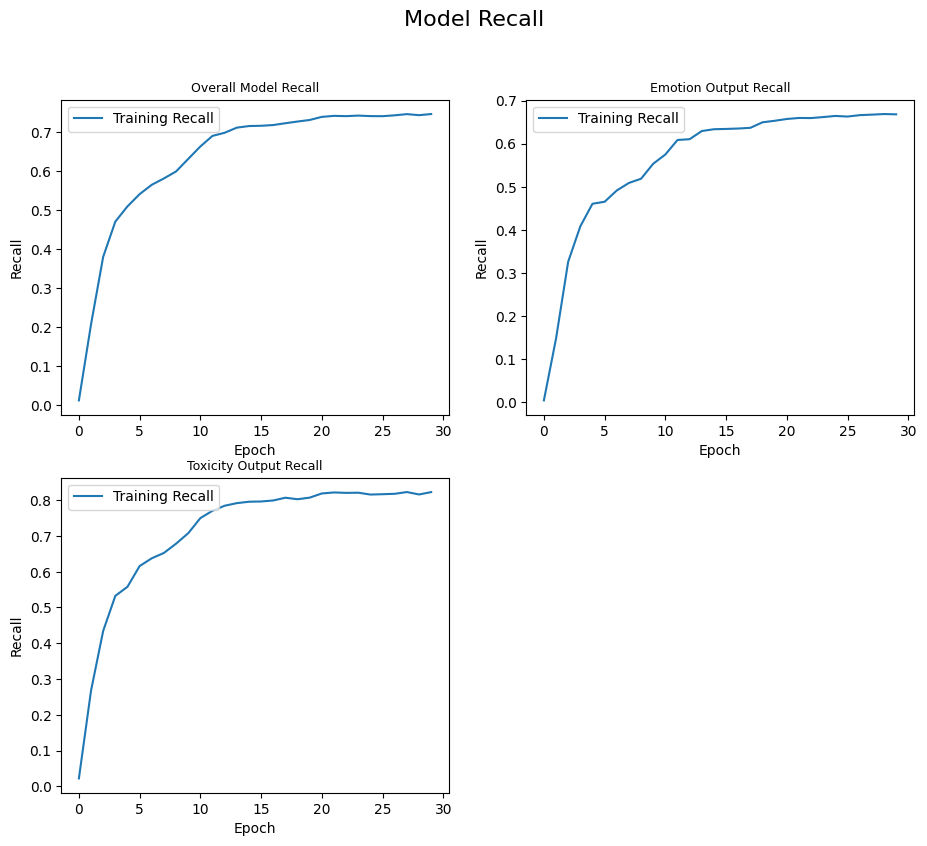

In [69]:
recall_epoch_plot(with_scheduler)

# With 2 bi lstm layers for each task

In [14]:
ps = pd.read_json('22-12-2023-05-27-31_mtm_with_bert_50_70_adam_40_20_with_regularization_history.json')


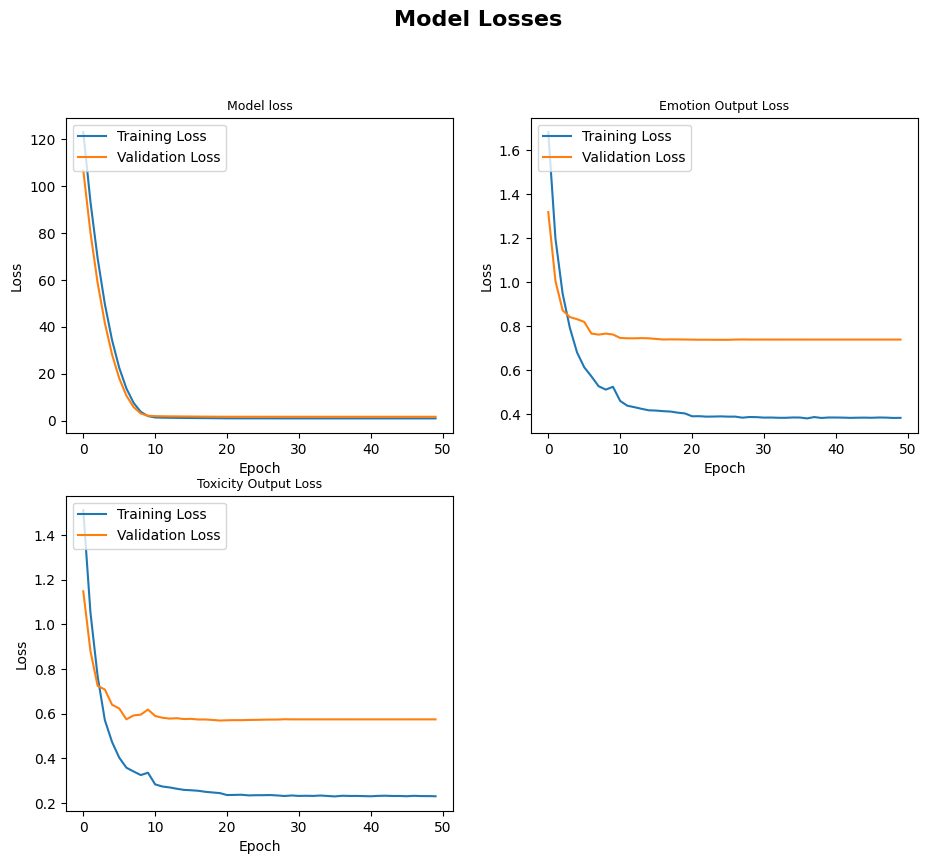

In [15]:
loss_epoch_plot(ps)

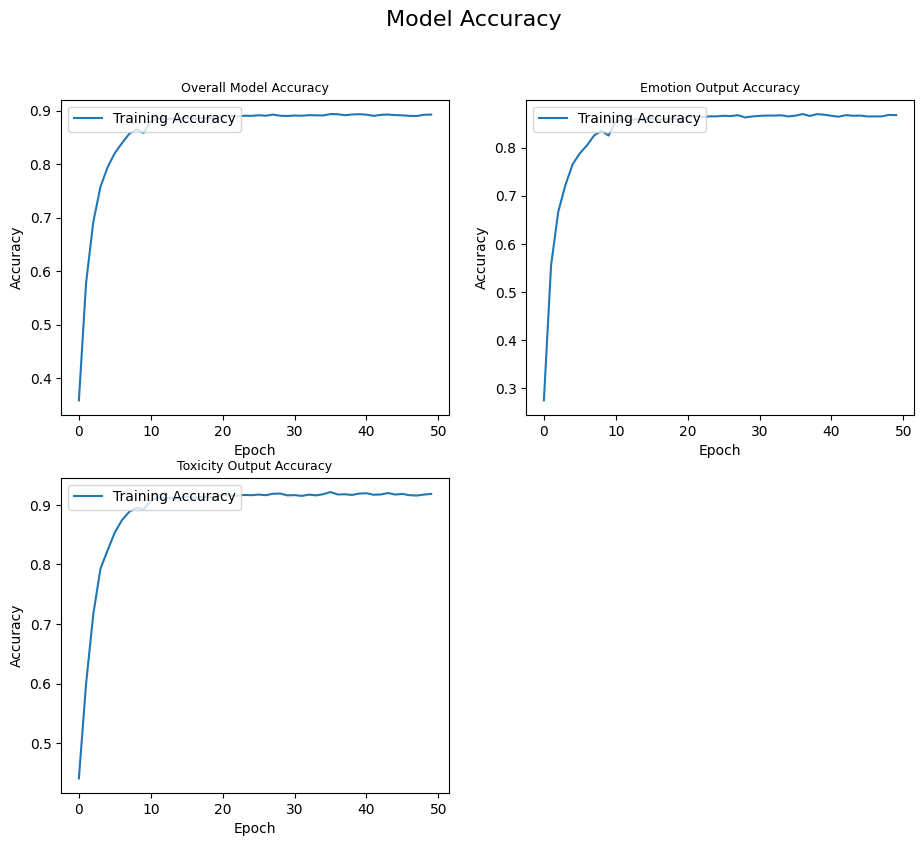

In [16]:
accuracy_epoch_plot(ps)

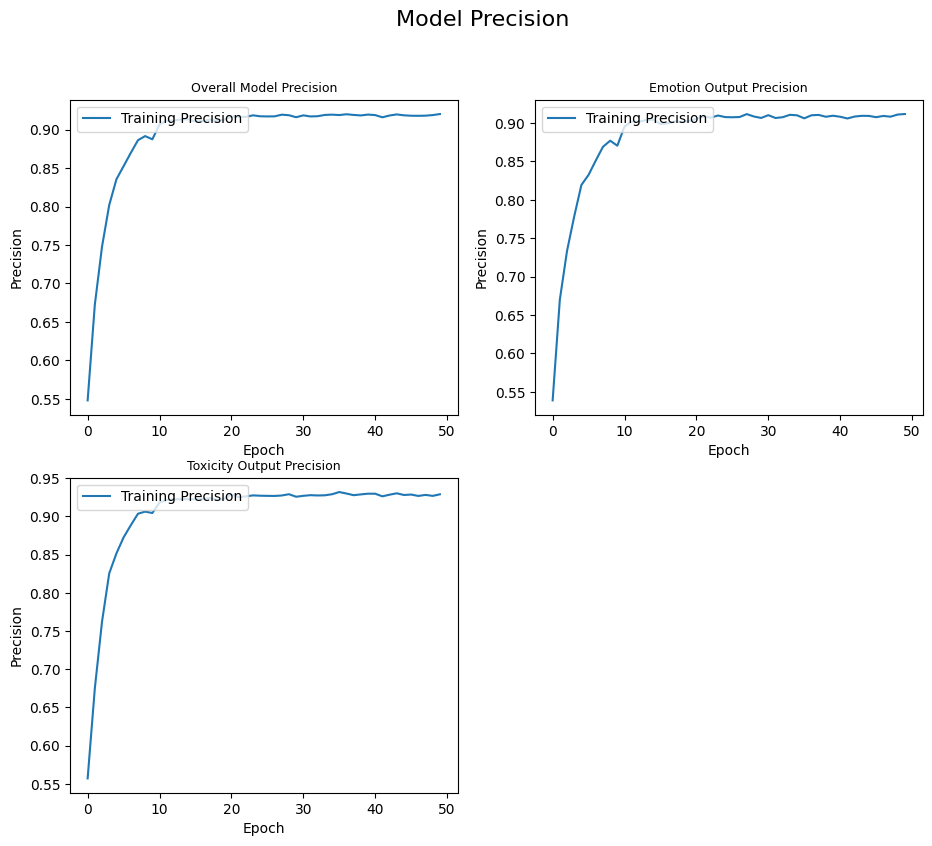

In [17]:
precision_epoch_plot(ps)

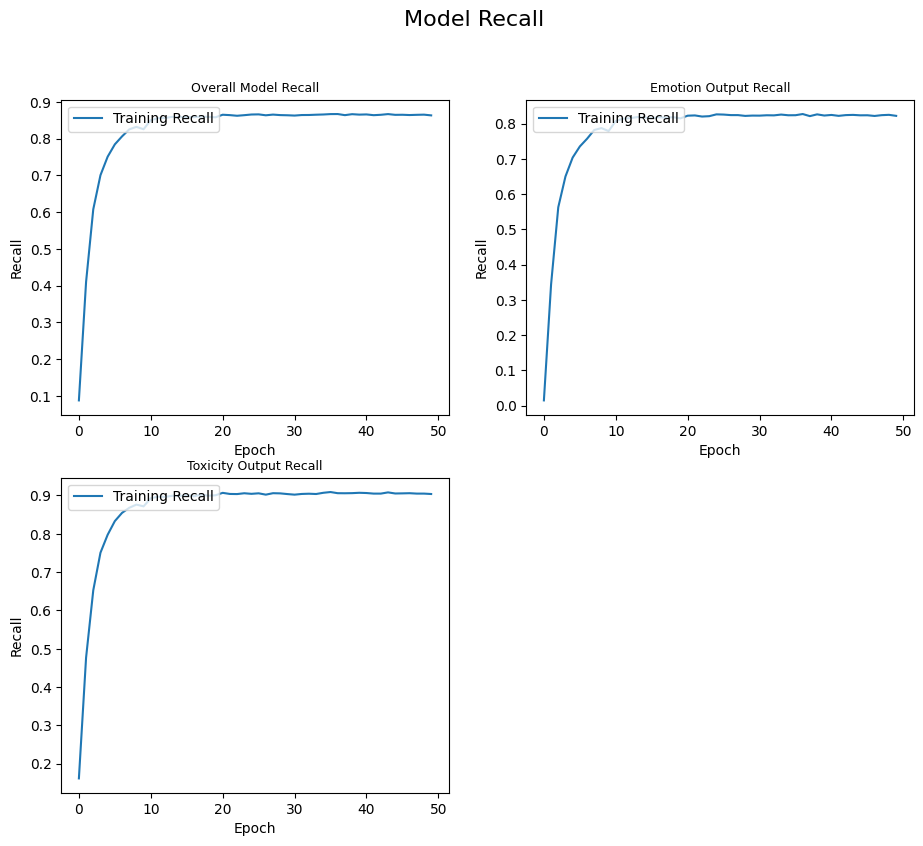

In [18]:
recall_epoch_plot(ps)

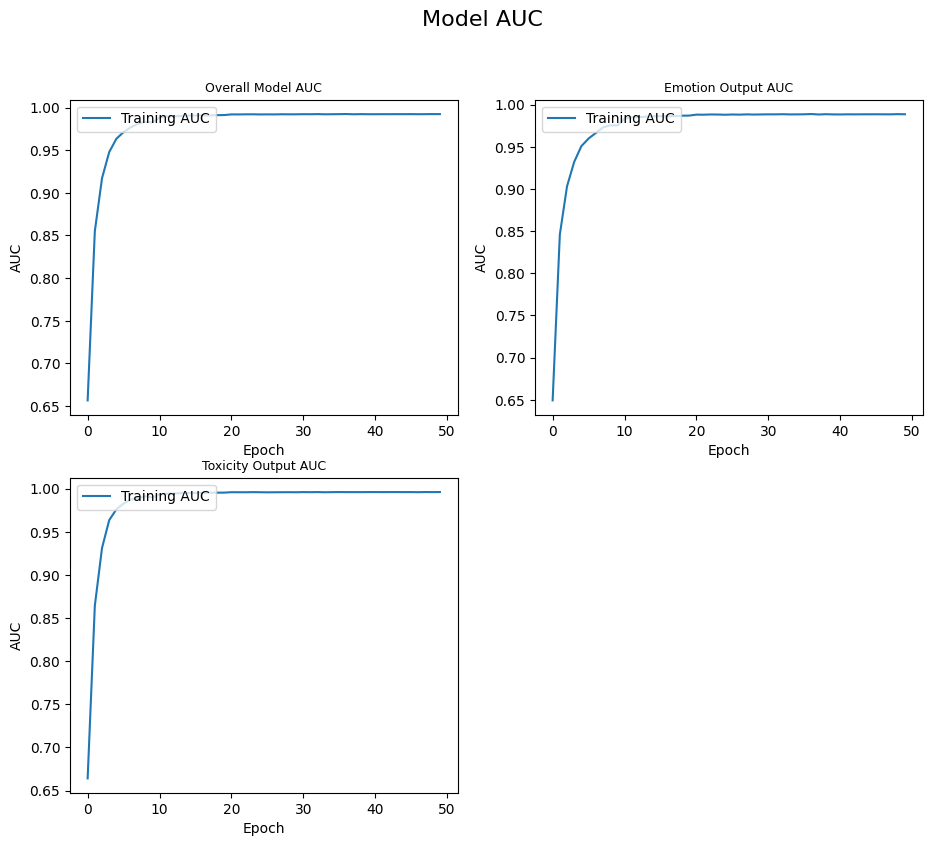

In [19]:
auc_epoch_plot(ps)

# Best So Far

In [20]:
bext_df = pd.read_json("22-12-2023-05-27-31_mtm_with_bert_50_70_adam_40_20_with_regularization_history.json")

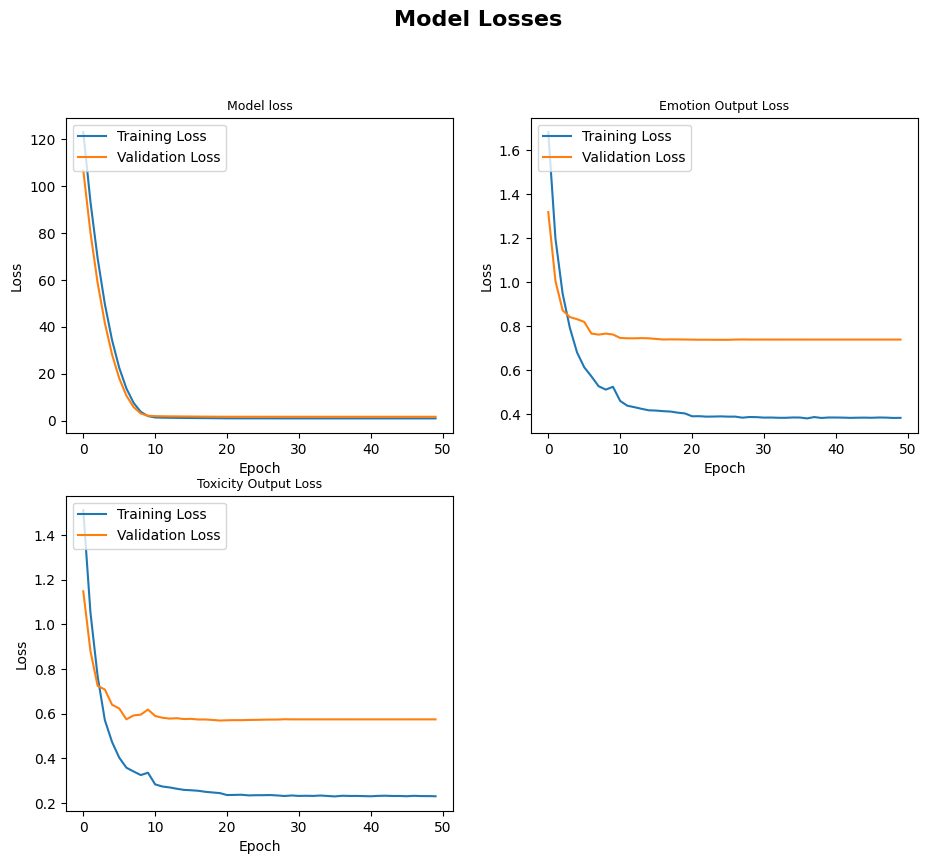

In [21]:
loss_epoch_plot(bext_df)

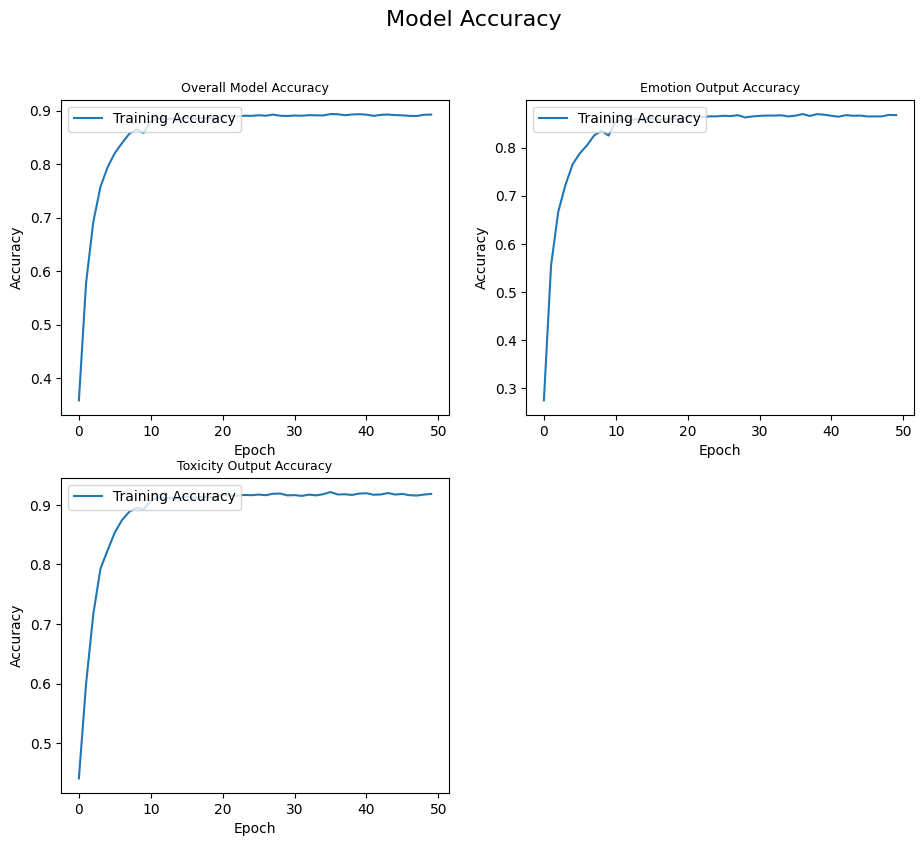

In [22]:
accuracy_epoch_plot(bext_df)

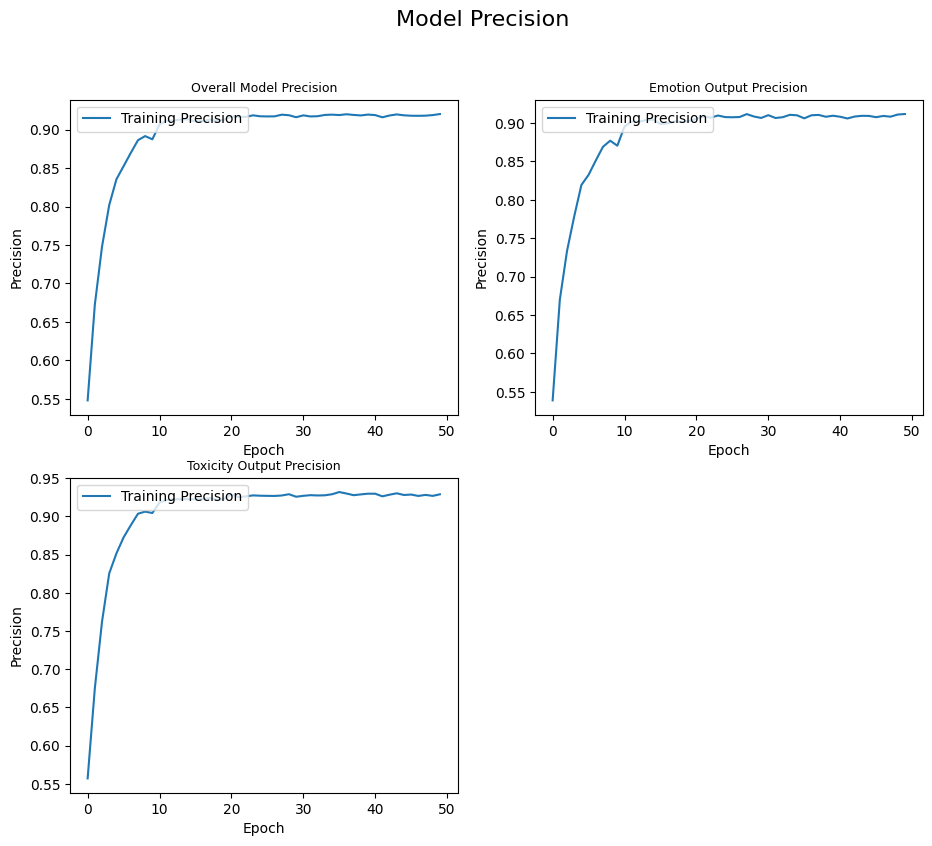

In [23]:
precision_epoch_plot(bext_df)

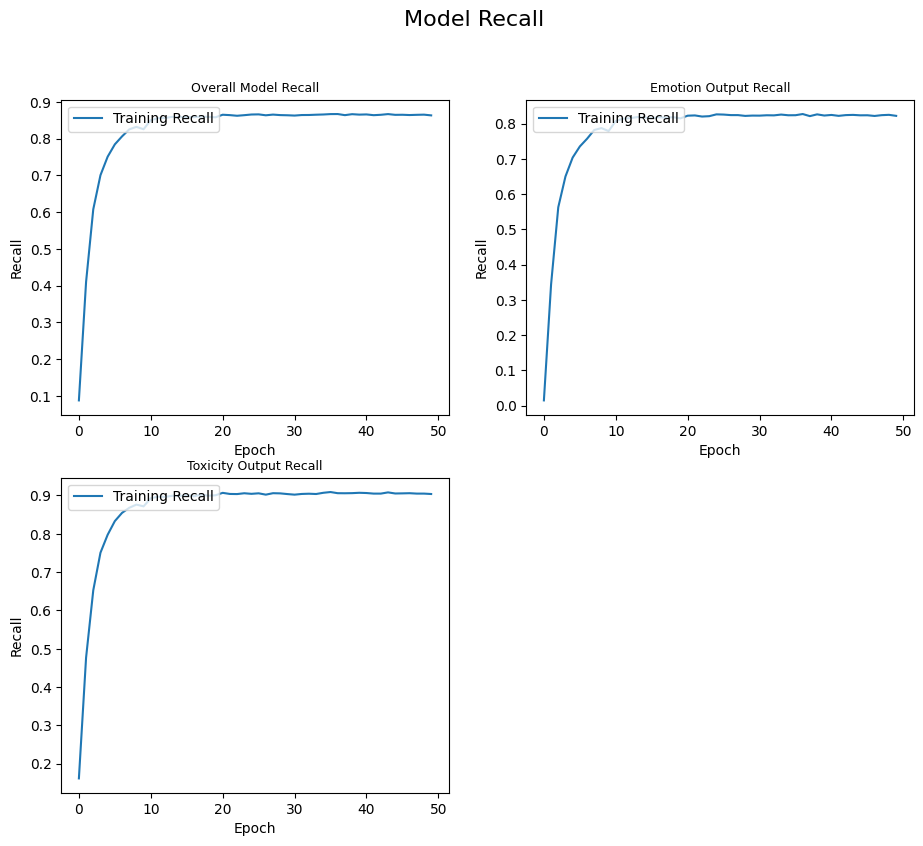

In [24]:
recall_epoch_plot(bext_df)

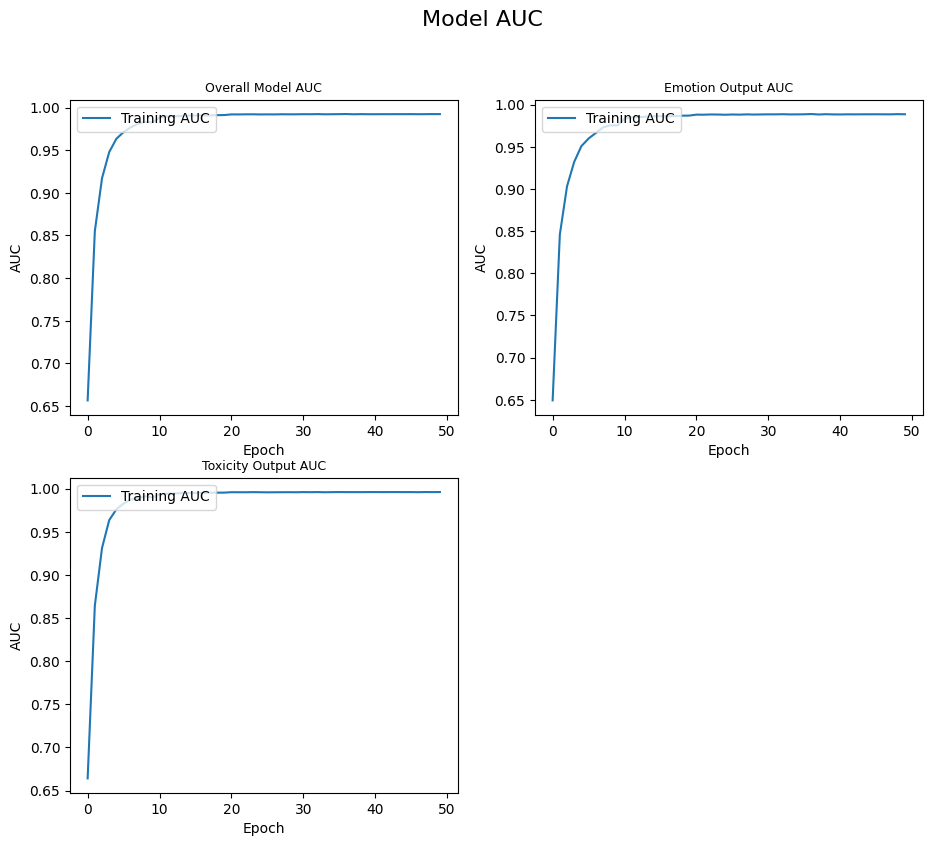

In [25]:
auc_epoch_plot(bext_df)

In [26]:
# Compute the variance of the loss and val_loss
loss = bext_df["loss"].iloc[-1]
val_loss = bext_df["val_loss"].iloc[-1]

# distance between the two losses
loss_distance = val_loss - loss

# Compute the variance of the emotion_output_loss and val_emotion_output_loss
emotion_output_loss = bext_df["emotion_output_loss"].iloc[-1]
val_emotion_output_loss = bext_df["val_emotion_output_loss"].iloc[-1]

# distance between the two losses
emotion_output_loss_distance = val_emotion_output_loss - emotion_output_loss

# Compute the variance of the toxicity_output_loss and val_toxicity_output_loss
toxicity_output_loss = bext_df["toxicity_output_loss"].iloc[-1]
val_toxicity_output_loss = bext_df["val_toxicity_output_loss"].iloc[-1]

# distance between the two losses
toxicity_output_loss_distance = val_toxicity_output_loss - toxicity_output_loss

print("loss_distance: ", loss_distance)
print("emotion_output_loss_distance: ", emotion_output_loss_distance)
print("toxicity_output_loss_distance: ", toxicity_output_loss_distance)

loss_distance:  0.699712216854096
emotion_output_loss_distance:  0.35550335049629206
toxicity_output_loss_distance:  0.34421443939208896


In [6]:
import pandas as pd
from utils.utils import BASE_PATH
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

e:\Mini Projects\Thesis\model-multitask-learning\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

tokenizer_multi = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model_multi = TFBertModel.from_pretrained('bert-base-multilingual-cased')

# tokenizer_large = BertTokenizer.from_pretrained('bert-large-uncased')
# bert_model_large = TFBertModel.from_pretrained('bert-large-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [8]:
import pandas as pd

In [9]:
test_df = pd.read_pickle(f"{BASE_PATH}/dataset/preprocessed_df_test.pkl")

In [10]:
bert_multilingual = "bi_lstm_bert_multi_model_20_70_adam_0.69_40_20_l1l2_0.085_0.09_each.h5"
bert_normal ="bi_lstm_bert_model_30_70_adam_0-69_42_21_l1l2_0-085_0-09_each.h5"
bert_fake = "bi_lstm_bert_model_30_70_adam_0-69_42_21_l1l2_0-085_0-09.h5"
loaded_model = tf.keras.models.load_model(bert_multilingual, custom_objects={'TFBertModel': bert_model_multi})

OSError: No file or directory found at bi_lstm_bert_multi_model_20_70_adam_0.69_40_20_l1l2_0.085_0.09_each.h5

In [ ]:
def encode_texts(texts):
        return np.array(tokenizer_multi.batch_encode_plus(texts, 
                                                    add_special_tokens=True, 
                                                    max_length=65, 
                                                    padding='max_length', 
                                                    return_attention_mask=False,
                                                    truncation=True,
                                                    return_tensors='tf')["input_ids"])

In [ ]:
X = encode_texts(test_df['chat'].values);

In [ ]:
pred = loaded_model.predict(X)

49/49 [==============================] - 39s 719ms/step


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
df_combined = pd.read_pickle(f"{BASE_PATH}/dataset/preprocessed_df_combined.pkl")
encoder_emotion = OneHotEncoder(sparse_output=False)
encoder_toxicity = OneHotEncoder(sparse_output=False)

y_emotion_combined = encoder_emotion.fit_transform(df_combined[['emotion']])
y_toxicity_combined = encoder_toxicity.fit_transform(df_combined[['toxicity']])

In [14]:
import pickle
with open(f"{BASE_PATH}/dataset/encoder_emotion.pkl", 'wb') as f:
    pickle.dump(encoder_emotion, f)

with open(f"{BASE_PATH}/dataset/encoder_toxicity.pkl", 'wb') as f:
    pickle.dump(encoder_toxicity, f)

In [25]:
encoder_emotion.inverse_transform(pred[0])

array([['surprise'],
       ['sad'],
       ['happy'],
       ...,
       ['anger'],
       ['sad'],
       ['anger']], dtype=object)

In [26]:
cm = confusion_matrix(test_df['emotion'].values, encoder_emotion.inverse_transform(pred[0]))
cm

array([[250,  52,   9,  25,  21,  45],
       [ 39, 161,  18,  20,  18,  41],
       [ 15,  22, 217,  20,  80,  28],
       [  7,   8,  13, 159,  23,   6],
       [  2,   3,  38,   1, 154,  15],
       [  0,   0,   0,   0,  11,  45]], dtype=int64)

In [27]:
encoder_emotion.categories_[0]

array(['anger', 'disgust', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [28]:
cm_tox = confusion_matrix(test_df['toxicity'].values, encoder_toxicity.inverse_transform(pred[1]))

In [29]:
test_df['toxicity'].value_counts()

toxicity
not toxic                         703
cyberbullying                     348
sarcasm                           217
gameplay experience complaints    113
multiple discrimination            84
blaming others                     78
gamesplaining                      23
Name: count, dtype: int64

In [30]:
encoder_toxicity.inverse_transform(pred[1])

array([['not toxic'],
       ['sarcasm'],
       ['sarcasm'],
       ...,
       ['blaming others'],
       ['sarcasm'],
       ['cyberbullying']], dtype=object)

In [31]:
encoder_toxicity.categories_[0]

array(['blaming others', 'cyberbullying',
       'gameplay experience complaints', 'gamesplaining',
       'multiple discrimination', 'not toxic', 'sarcasm'], dtype=object)

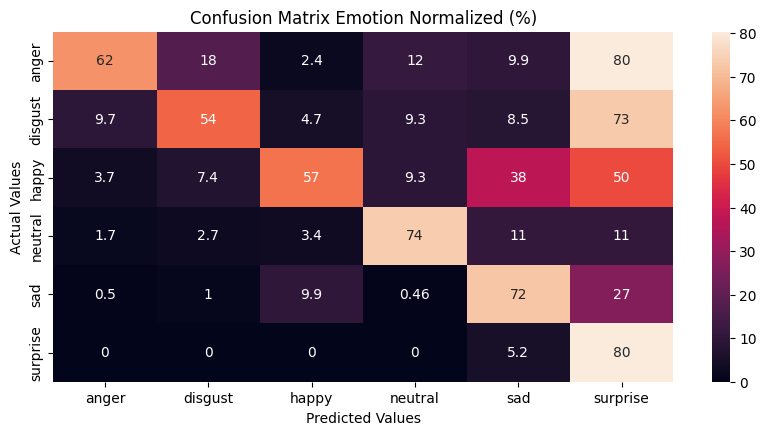

In [32]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2, 1, 1)
sns.heatmap((cm / cm.sum(axis=1))*100, annot=True)
ax.set_title('Confusion Matrix Emotion Normalized (%)')
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.xaxis.set_ticklabels(encoder_emotion.categories_[0].tolist())
ax.yaxis.set_ticklabels(encoder_emotion.categories_[0].tolist())

plt.show()


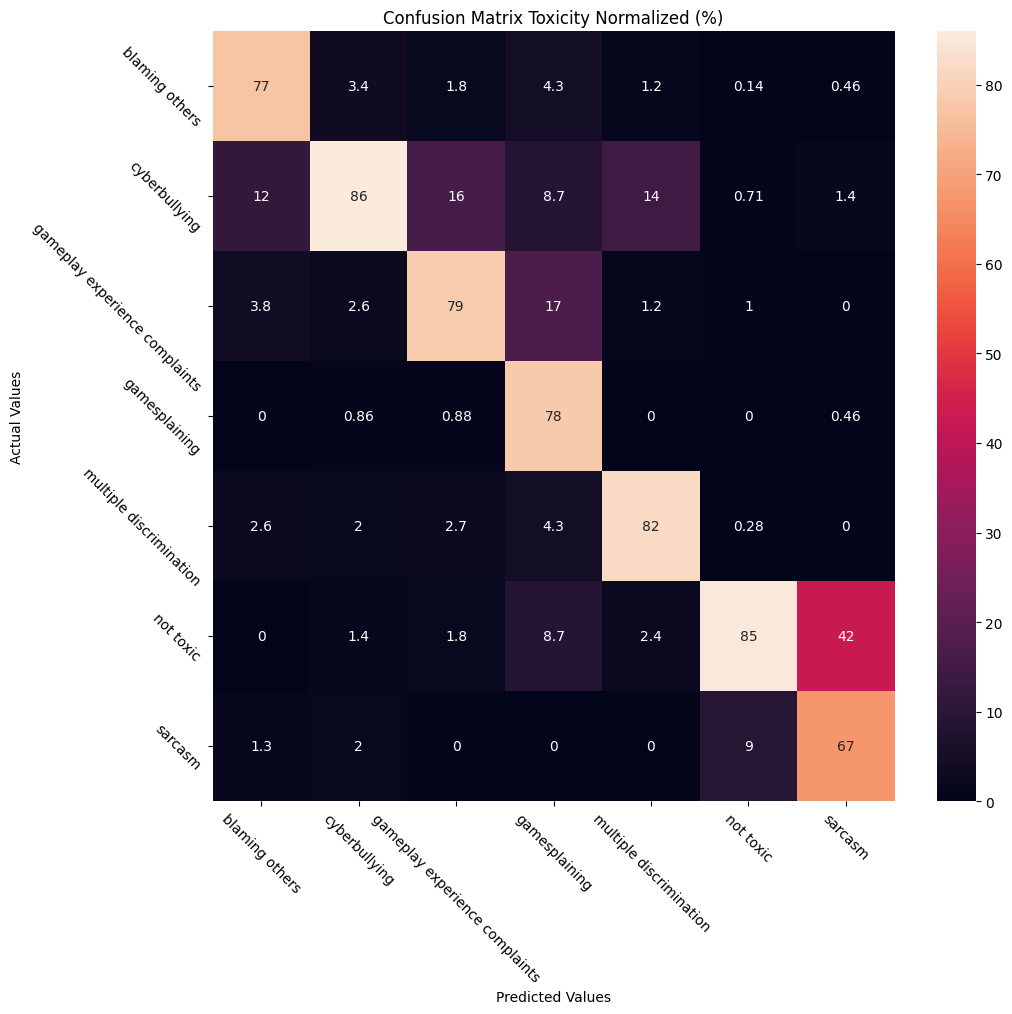

In [33]:
fig = plt.figure(figsize=(11,10))
axs = fig.add_subplot(1, 1, 1)
sns.heatmap((cm_tox/cm_tox.sum(axis=1))*100, annot=True)
axs.set_title('Confusion Matrix Toxicity Normalized (%)')
axs.set_ylabel('Actual Values')
axs.set_xlabel('Predicted Values')
axs.xaxis.set_ticklabels(encoder_toxicity.categories_[0].tolist(), rotation=-45)
axs.yaxis.set_ticklabels(encoder_toxicity.categories_[0].tolist(), rotation=-45) 


plt.show()

In [48]:
cr_emo = classification_report(test_df['emotion'].values, encoder_emotion.inverse_transform(pred[0]))

In [49]:
cr_tox = classification_report(test_df['toxicity'].values, encoder_toxicity.inverse_transform(pred[1]))

In [50]:
df_cr_emotion = pd.DataFrame.from_dict(classification_report(test_df['emotion'].values, encoder_emotion.inverse_transform(pred[0]), output_dict=True)).transpose()

In [51]:
df_cr_toxicity = pd.DataFrame.from_dict(classification_report(test_df['toxicity'].values, encoder_toxicity.inverse_transform(pred[1]), output_dict=True)).transpose()

In [52]:
df_cr_toxicity

,precision,recall,f1-score,support
blaming others,0.800000,0.769231,0.784314,78.000000
cyberbullying,0.874269,0.859195,0.866667,348.000000
gameplay experience complaints,0.773913,0.787611,0.780702,113.000000
gamesplaining,0.642857,0.782609,0.705882,23.000000
multiple discrimination,0.811765,0.821429,0.816568,84.000000
not toxic,0.884956,0.853485,0.868936,703.000000
sarcasm,0.600823,0.672811,0.634783,217.000000
accuracy,0.818008,0.818008,0.818008,0.818008
macro avg,0.769798,0.792339,0.779693,1566.000000
weighted avg,0.823483,0.818008,0.820199,1566.000000


In [53]:
df_cr_emotion

,precision,recall,f1-score,support
anger,0.798722,0.621891,0.699301,402.00000
disgust,0.654472,0.542088,0.593002,297.00000
happy,0.735593,0.568063,0.641064,382.00000
neutral,0.706667,0.736111,0.721088,216.00000
sad,0.501629,0.723005,0.592308,213.00000
surprise,0.250000,0.803571,0.381356,56.00000
accuracy,0.629630,0.629630,0.629630,0.62963
macro avg,0.607847,0.665788,0.604686,1566.00000
weighted avg,0.683236,0.629630,0.642017,1566.00000


In [147]:
# Average Accuracy
avg_acc = (bext_df['emotion_output_accuracy'].iloc[-1] + bext_df['toxicity_output_accuracy'].iloc[-1]) / 2

NameError: name 'bext_df' is not defined

In [ ]:
avg_acc

0.8927330672740931